# Plot and Save Learning Curves

In [4]:
import os
import copy

import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

import torchvision
from torchvision.io import read_image
from torchvision import datasets, models, transforms

from tqdm.notebook import trange, tqdm

## Current

In [1]:
ALL_MODEL_NAMES = [
    'baseline-2021-06-09',
    'baseline-Adam-2021-06-11',
    
    'Adam_wd=1e-08_2021-06-11',
    'Adam_wd=0.0001_2021-06-11',
    'Adam_wd=0.01_2021-06-11',
    'Adam_wd=1_2021-06-11',
    'Adam_wd=10_2021-06-11',
    'Adam_wd=100_2021-06-11',
    
    'strong-aug-Adam-2021-06-14',
    'strong-aug-longer-Adam-2021-06-14',
    'strong-aug-even-longer-Adam-2021-06-14',
    'strong-aug-not-so-long-Adam-2021-06-14',
    'strong-aug-not-so-long-Adam_wd=0.01_2021-06-14'
    
]

In [70]:
MODEL_NAME = 'strong-aug-not-so-long-Adam_wd=10_2021-06-14'

In [71]:
%ls ../history/

Adam_wd=0.0001_2021-06-11.json
Adam_wd=0.01_2021-06-11.json
Adam_wd=100_2021-06-11.json
Adam_wd=10_2021-06-11.json
Adam_wd=1_2021-06-11.json
Adam_wd=1e-08_2021-06-11.json
baseline-2021-06-09.json
baseline-Adam-2021-06-11.json
dummy-classifier.json
strong-aug-Adam-2021-06-14.json
strong-aug-even-longer-Adam-2021-06-14.json
strong-aug-longer-Adam-2021-06-14.json
strong-aug-not-so-long-Adam-2021-06-14.json
strong-aug-not-so-long-Adam_wd=0.01_2021-06-14.json
strong-aug-not-so-long-Adam_wd=0.1_2021-06-14.json
strong-aug-not-so-long-Adam_wd=10_2021-06-14.json
strong-aug-not-so-long-Adam_wd=1_2021-06-14.json


### Plot and Save Learning Curves

In [72]:
with open(f'../history/{MODEL_NAME}.json') as f:
    history = json.load(f)
    
with open(f'../history/dummy-classifier.json') as f:
    dummy = json.load(f)

In [73]:
dummy

{'loss_w_all_one_half_probs': 2.7725887298583984,
 'train_per_class_accuracies': [0.7953125238418579,
  0.7875000238418579,
  0.7734375,
  0.637499988079071],
 'dev_per_class_accuracies': [0.785937488079071,
  0.7906249761581421,
  0.776562511920929,
  0.6343749761581421],
 'train_average_accuracy': 0.7484375238418579,
 'dev_average_accuracy': 0.7468749284744263}

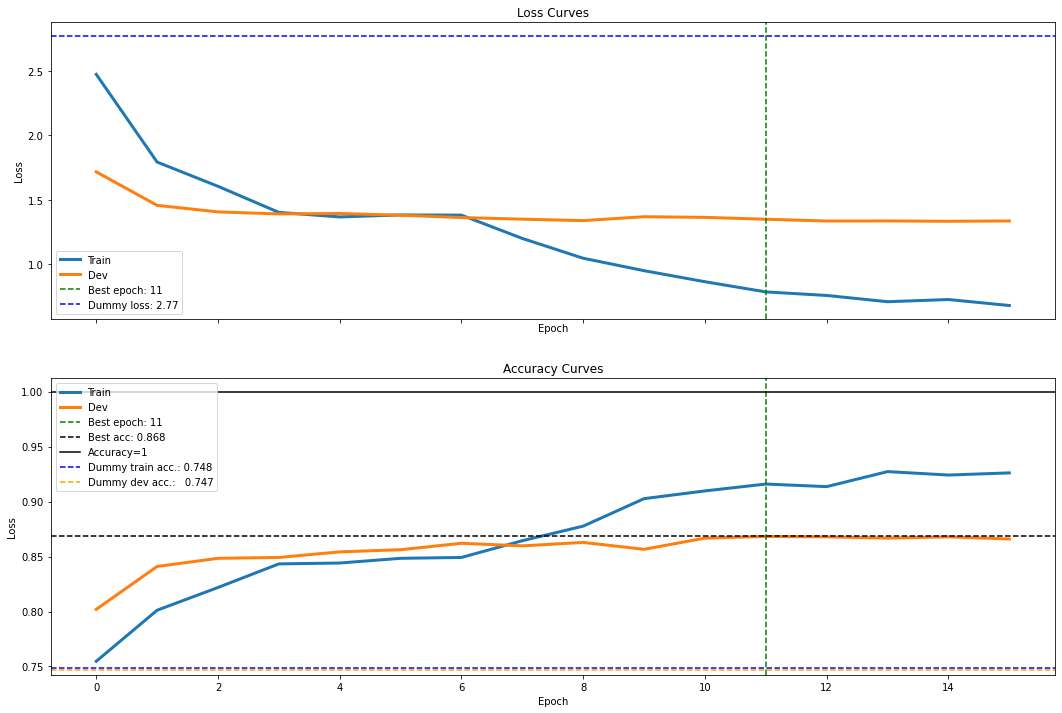

In [74]:
f, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(18, 12))


ax1.plot(np.arange(len(history['train_losses'])), history['train_losses'], label=f'Train', linewidth=3)
ax1.plot(np.arange(len(history['dev_losses'])), history['dev_losses'], label=f'Dev', linewidth=3)

ax1.axvline(x=history['best_epoch'], label=f"Best epoch: {history['best_epoch']}", color='green', ls='--')
ax1.axhline(y=dummy['loss_w_all_one_half_probs'], label=f"Dummy loss: {dummy['loss_w_all_one_half_probs']:.3}", color='blue', ls='--')

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title("Loss Curves")
ax1.legend(loc='best')

ax2.plot(np.arange(len(history['train_average_accuracies'])), history['train_average_accuracies'], label=f'Train', linewidth=3)
ax2.plot(np.arange(len(history['dev_average_accuracies'])), history['dev_average_accuracies'], label=f'Dev', linewidth=3)
ax2.axvline(x=history['best_epoch'], label=f"Best epoch: {history['best_epoch']}", color='green', ls='--')
ax2.axhline(y=history['best_acc'], label=f"Best acc: {history['best_acc']:.3}", color='black', ls='--')
ax2.axhline(y=1, label=f"Accuracy=1", color='black', ls='-')
ax2.axhline(y=dummy['train_average_accuracy'], label=f"Dummy train acc.: {dummy['train_average_accuracy']:.3}", color='blue', ls='--')
ax2.axhline(y=dummy['dev_average_accuracy'], label=f"Dummy dev acc.:   {dummy['dev_average_accuracy']:.3}", color='orange', ls='--')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title(f"Accuracy Curves")

ax2.legend(loc='best')

plt.savefig(f'../learning_curves/{MODEL_NAME}.png', dpi=300, bbox_inches='tight')
plt.show()

### Results

In [75]:
# sanity check
assert np.max(history['dev_average_accuracies']) == history['best_acc']
assert np.argmax(history['dev_average_accuracies']) == history['best_epoch']

In [76]:
bias = 1 - np.max(history['train_average_accuracies'])
variance = np.max(history['train_average_accuracies']) - history['dev_average_accuracies'][history['best_epoch']]

print("### Results\n")
print(f"* Bayes acc: {1.:.3}")
print(f"* Train acc: {np.max(history['train_average_accuracies']):.3}")
print(f"* Dev acc:   {history['best_acc']:.3}")
print("\n**Train acc.**")
print("\n**Dev acc.**")
print("\n**Overall.**")

print('\n\n### Bias-Varience\n')
print(f"* Bias:      {bias:.3}")
print(f"* Variance:  {variance:.3}")
print("\n**Bias.**")
print("\n**Variance.**")
print("\n**Overall.**")

print("\n### Next Step")

### Results

* Bayes acc: 1.0
* Train acc: 0.927
* Dev acc:   0.868

**Train acc.**

**Dev acc.**

**Overall.**


### Bias-Varience

* Bias:      0.0727
* Variance:  0.059

**Bias.**

**Variance.**

**Overall.**

### Next Step


In [68]:
# # plot losses
# plt.figure(figsize=(18, 9))
# plt.plot(np.arange(len(history['train_losses'])), history['train_losses'], label=f'Train', linewidth=3)
# plt.plot(np.arange(len(history['dev_losses'])), history['dev_losses'], label=f'Dev', linewidth=3)
# plt.axvline(x=history['best_epoch'], label=f"Best epoch: {history['best_epoch']}", color='red', ls='--')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title("Loss Curves")
# plt.legend(loc='best')
# plt.show()

In [182]:
# # plot accuracies
# plt.figure(figsize=(18, 9))
# plt.plot(np.arange(len(history['train_average_accuracies'])), history['train_average_accuracies'], label=f'Train', linewidth=3)
# plt.plot(np.arange(len(history['dev_average_accuracies'])), history['dev_average_accuracies'], label=f'Dev', linewidth=3)
# plt.axvline(x=history['best_epoch'], label=f"Best epoch: {history['best_epoch']}", color='red', ls='--')
# plt.axhline(y=history['best_acc'], label=f"Best acc: {history['best_acc']:.3}", color='black', ls='--')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title(f"Accuracy Curves")
# plt.legend(loc='best')
# plt.show()